# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [96]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [97]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather['coord']['lat']
        city_lng      = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds   = city_weather['clouds']['all']
        city_wind     = city_weather['wind']['speed']
        city_country  = city_weather['sys']['country']
        city_date     = city_weather['dt']
        
        # Append the City information into city_data list
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | paya
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | gombong
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | solwezi
Processing Record 10 of Set 1 | magistral'nyy
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | san luis
Processing Record 15 of Set 1 | trairi
Processing Record 16 of Set 1 | cuauhtemoc
Processing Record 17 of Set 1 | la tuque
Processing Record 18 of Set 1 | bikaner
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | taiohae
City not found. Ski

In [98]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [103]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,75.74,74,40,16.11,US,1685127382
1,enewetak,11.3474,162.3373,81.84,79,100,16.46,MH,1685127382
2,petropavlovsk-kamchatsky,53.0452,158.6483,43.39,76,75,4.47,RU,1685127383
3,petropolis,59.8944,30.2642,51.94,87,75,4.47,RU,1685127383
4,kralendijk,12.1500,-68.2667,89.58,66,40,16.11,BQ,1685127383


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,75.74,74,40,16.11,US,1685127382
1,enewetak,11.3474,162.3373,81.84,79,100,16.46,MH,1685127382
2,petropavlovsk-kamchatsky,53.0452,158.6483,43.39,76,75,4.47,RU,1685127383
3,petropolis,59.8944,30.2642,51.94,87,75,4.47,RU,1685127383
4,kralendijk,12.1500,-68.2667,89.58,66,40,16.11,BQ,1685127383


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

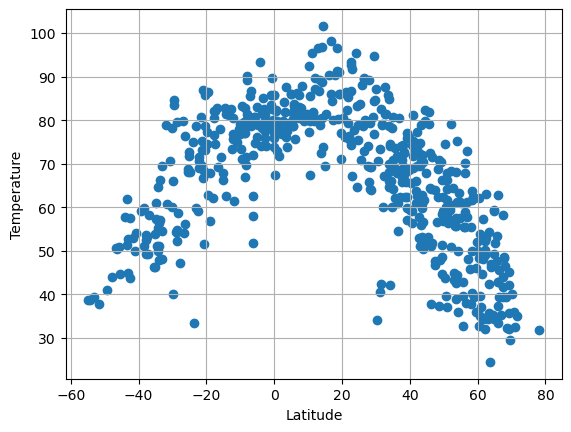

In [106]:
# Build scatter plot for latitude vs. temperature

Latitude    = city_data_df['Lat']
Temperature = city_data_df['Max Temp']
plt.scatter(Latitude,Temperature)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

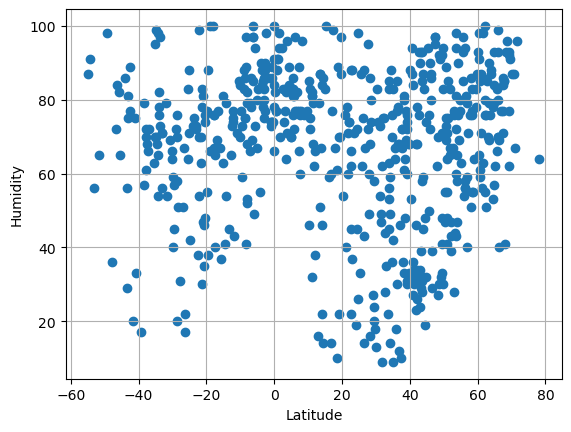

In [107]:
# # Build scatter plot for latitude vs. humidity
Latitude    = city_data_df['Lat']
Humidity    = city_data_df['Humidity']
plt.scatter(Latitude,Humidity)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

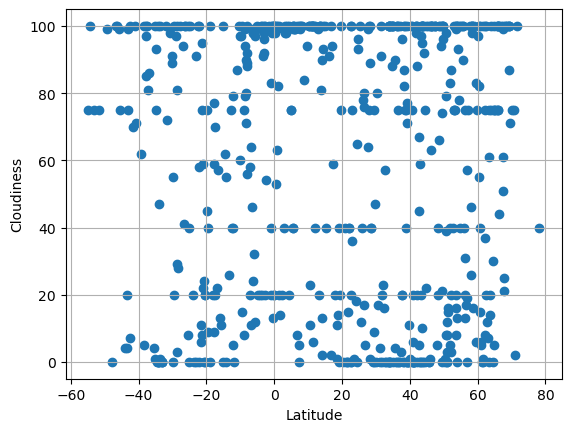

In [108]:
# # Build scatter plot for latitude vs. cloudiness
Latitude      = city_data_df['Lat']
Cloudiness    = city_data_df['Cloudiness']
plt.scatter(Latitude,Cloudiness)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

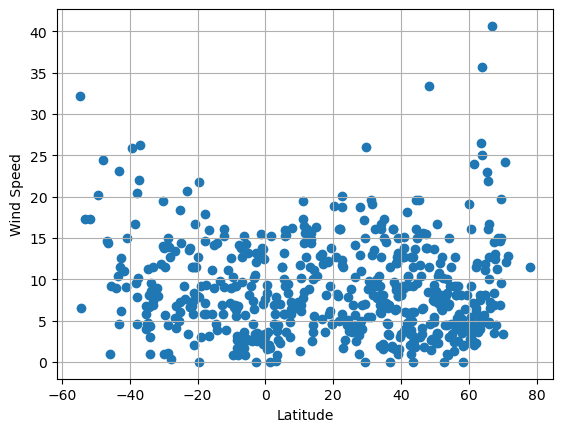

In [109]:
# # Build scatter plot for latitude vs. wind speed
Latitude     = city_data_df['Lat']
WindSpeed    = city_data_df['Wind Speed']
plt.scatter(Latitude,WindSpeed)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def myRegression (xVal,yVal):
    return linregress(xVal, yVal)

    


In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,75.74,74,40,16.11,US,1685127382
1,enewetak,11.3474,162.3373,81.84,79,100,16.46,MH,1685127382
2,petropavlovsk-kamchatsky,53.0452,158.6483,43.39,76,75,4.47,RU,1685127383
3,petropolis,59.8944,30.2642,51.94,87,75,4.47,RU,1685127383
4,kralendijk,12.1500,-68.2667,89.58,66,40,16.11,BQ,1685127383


In [112]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
# Displa1y sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,belmonte,-15.8631,-38.8828,78.04,67,13,11.07,BR,1685127143
6,edinburgh of the seven seas,-37.0676,-12.3116,58.23,72,86,26.31,SH,1685127384
9,ushuaia,-54.8000,-68.3000,38.82,87,75,32.21,AR,1685127384
12,port-aux-francais,-49.3500,70.2167,41.02,98,99,20.20,TF,1685127384
14,saint-pierre,-21.3393,55.4781,73.08,78,75,11.50,RE,1685127385


###  Temperature vs. Latitude Linear Regression Plot

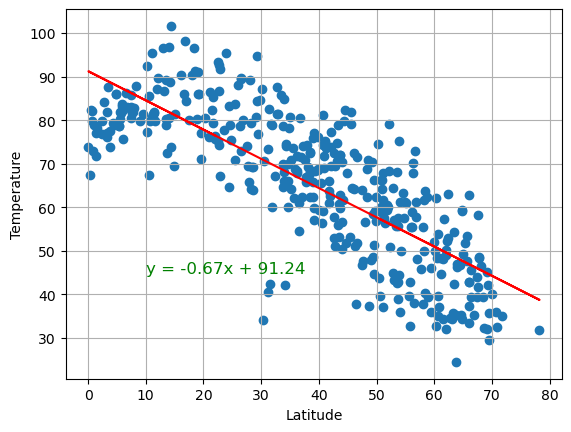

RValue is: -0.7921842453208046


In [113]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

Latitude    = northern_hemi_df['Lat']
Temperature = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,45),fontsize=12,color="green")
plt.scatter(Latitude,Temperature)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))


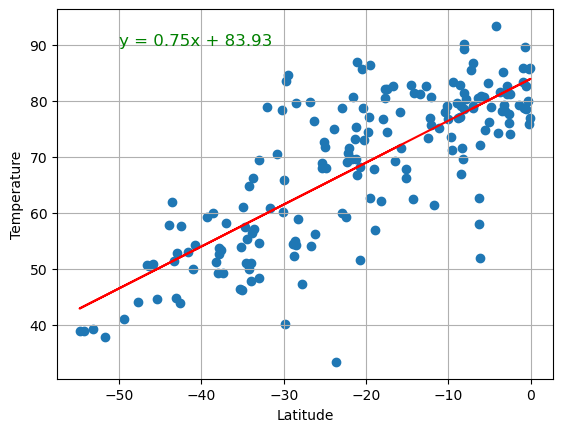

RValue is: 0.7821233979782704


In [114]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

Latitude    = southern_hemi_df['Lat']
Temperature = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Temperature)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,90),fontsize=12,color="green")
plt.scatter(Latitude,Temperature)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a visible relationship between latitude and the other factors( temperature, humidity, etc). on The north temperatures are lower than at the Equator, in the South the opposite happens.

### Humidity vs. Latitude Linear Regression Plot

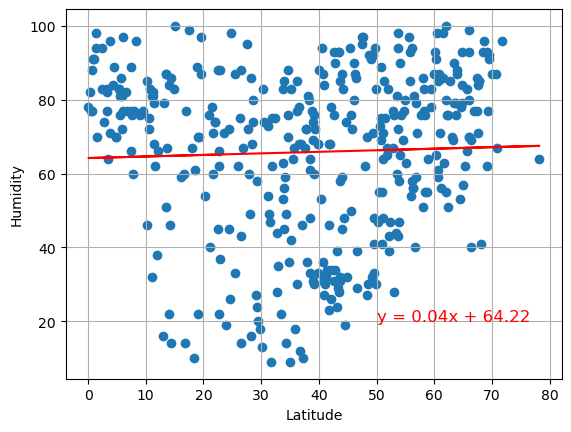

RValue is: 0.03665004291659692


In [115]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

Latitude    = northern_hemi_df['Lat']
Humidity    = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.scatter(Latitude,Humidity)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))

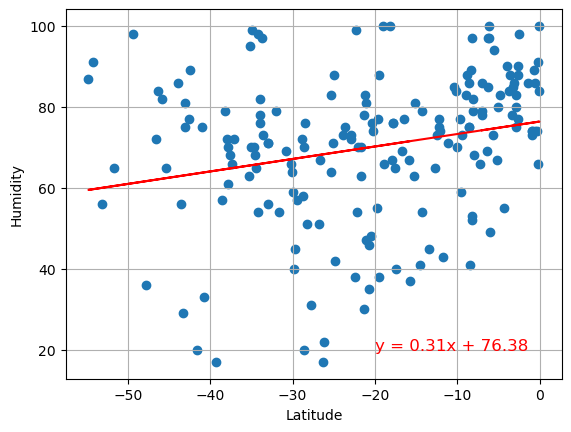

RValue is: 0.23968934764253705


In [116]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

Latitude    = southern_hemi_df['Lat']
Humidity    = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Humidity)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
plt.scatter(Latitude,Humidity)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

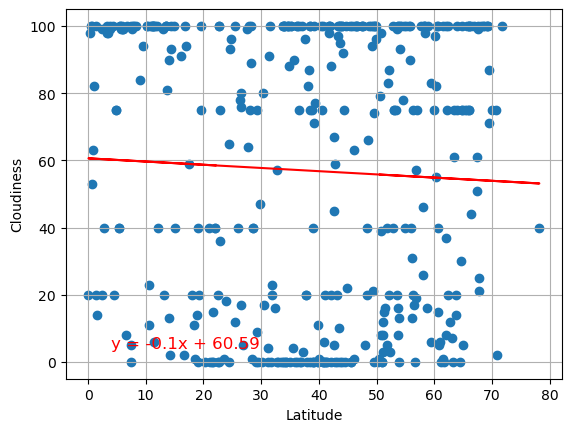

RValue is: -0.04548223701600521


In [117]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

Latitude    = northern_hemi_df['Lat']
Cloudiness  = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(4.0,4.0),fontsize=12,color="red")
plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))

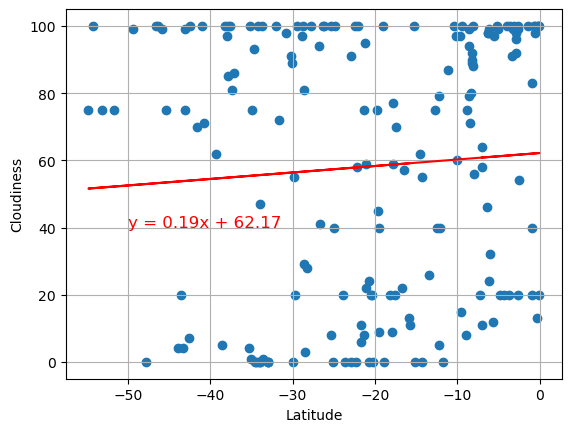

RValue is: 0.07040281154725474


In [118]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

Latitude    = southern_hemi_df['Lat']
Cloudiness  = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, Cloudiness)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=12,color="red")
plt.scatter(Latitude,Cloudiness)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

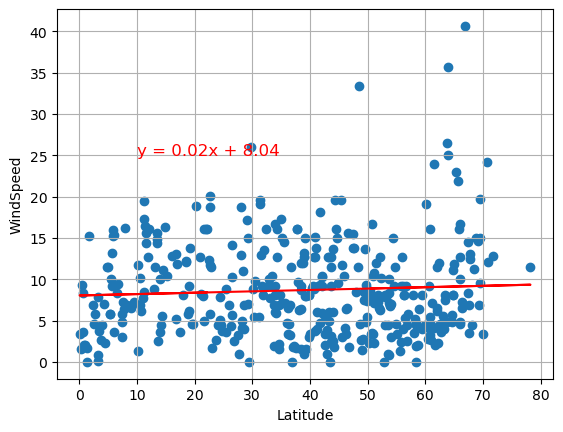

RValue is: 0.056756249036425205


In [119]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

Latitude    = northern_hemi_df['Lat']
WindSpeed  = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, WindSpeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,25),fontsize=12,color="red")
plt.scatter(Latitude,WindSpeed)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))

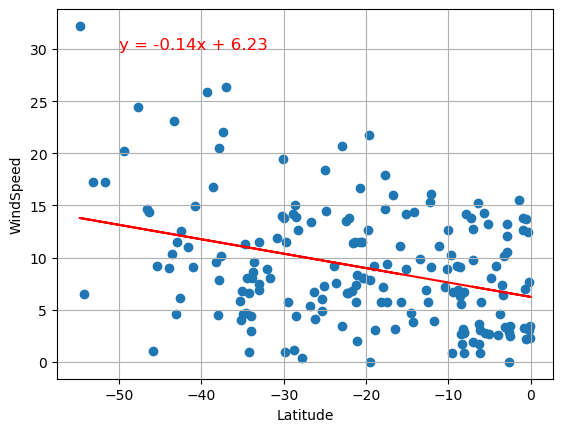

RValue is: -0.34074001157578954


In [120]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

Latitude    = southern_hemi_df['Lat']
WindSpeed   = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = myRegression(Latitude, WindSpeed)
regress_values = Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.scatter(Latitude,WindSpeed)
plt.plot(Latitude,regress_values,"r-")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()
print("RValue is: " + str(rvalue))


**Discussion about the linear relationship:** YOUR RESPONSE HERE